In [2]:
!pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 41.5 MB/s eta 0:00:00


In [3]:
from pywaffle import Waffle
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df_can = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [5]:
df_can.set_index('Country',inplace = True)
dsn_list = ['Denmark','Sweden','Norway']
df_totals = df_can.loc[dsn_list]['Total']
df_totals

,Total
Country,
Denmark,3901
Sweden,5866
Norway,2327


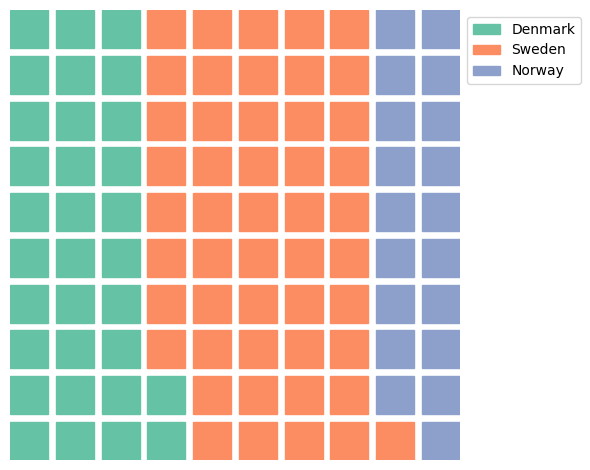

In [6]:
plt.figure(FigureClass=Waffle,rows=10,columns=10,values=df_totals,labels=list(df_totals.index),legend = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)})
plt.show()

In [7]:
from wordcloud import WordCloud, STOPWORDS


In [8]:
text_data = "Canada is a great country with great mountains and great people"

In [9]:
wc = WordCloud(stopwords=STOPWORDS, background_color='white')

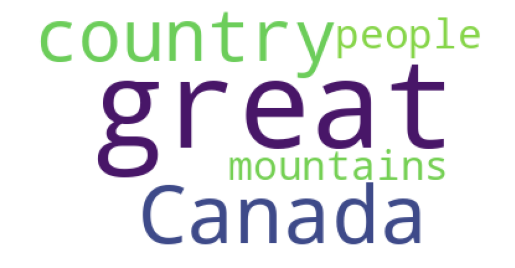

In [10]:
wc.generate(text_data)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [11]:
import urllib

# # open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [15]:
alice_wc = WordCloud(stopwords=STOPWORDS,background_color="white")

alice_wc.generate(alice_novel)

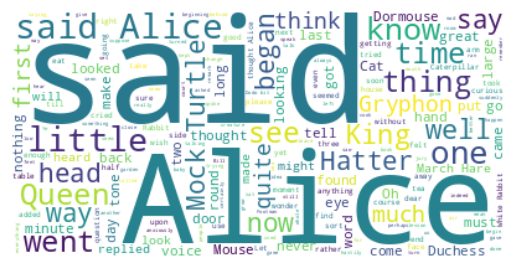

In [18]:
plt.imshow(alice_wc,interpolation="bilinear")
plt.axis("off")
plt.show()

In [19]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

In [20]:
import seaborn as sns

In [ ]:
sns.countplot(x='Continent',data = df_can)

In [21]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

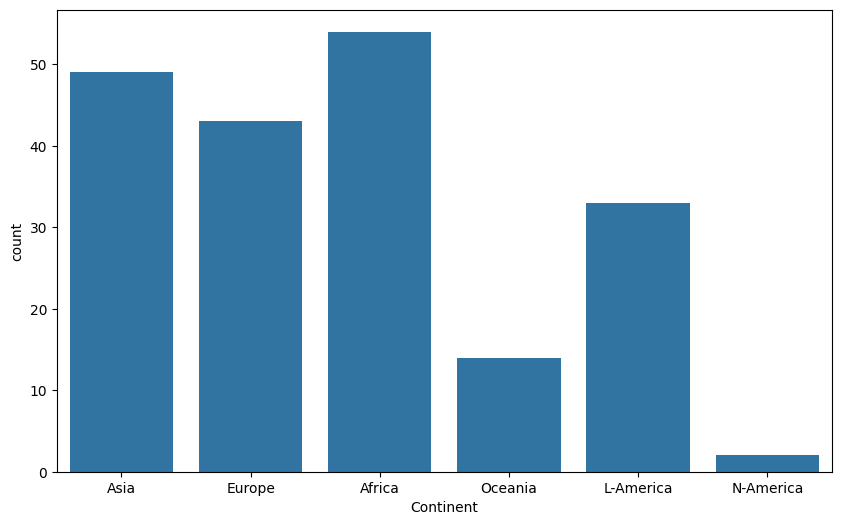

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Continent', data=df_can1)

<Axes: xlabel='Continent', ylabel='Total'>

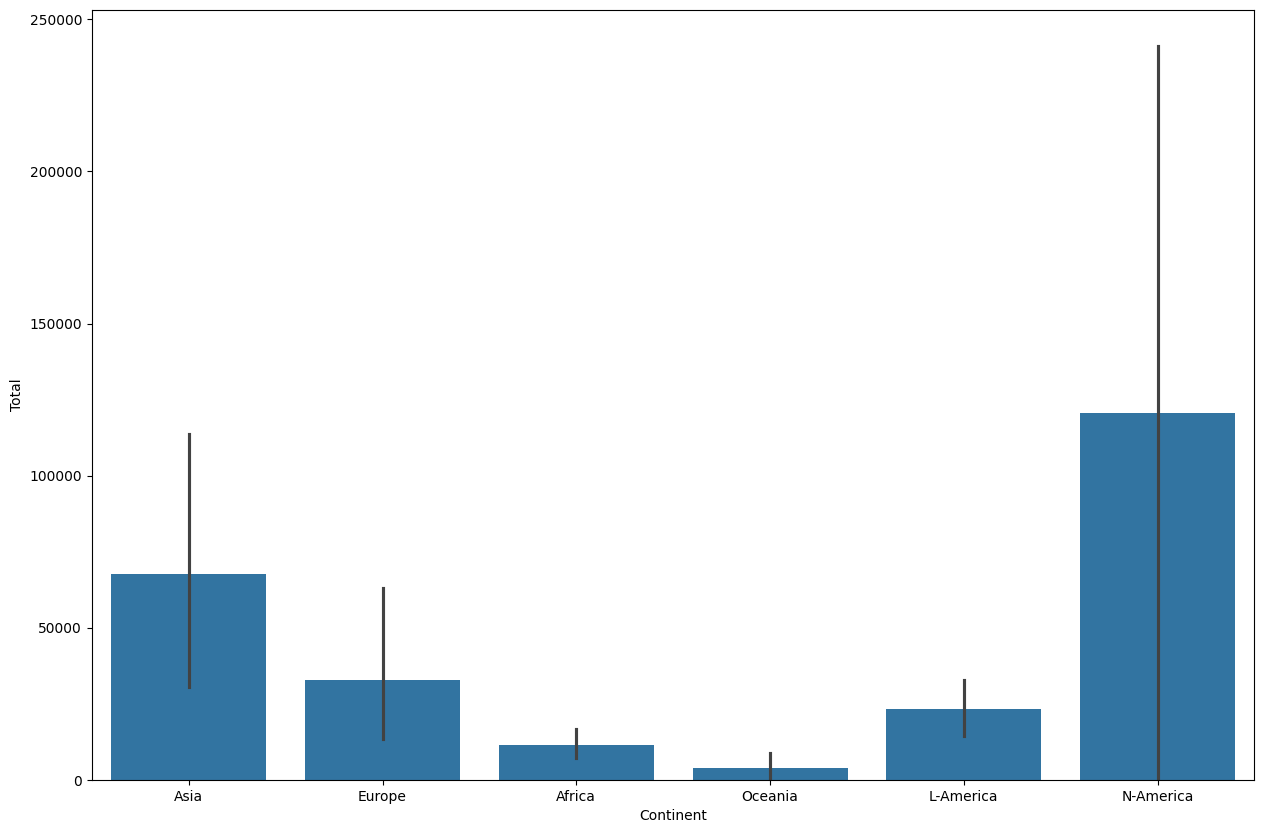

In [24]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)

In [25]:
df_Can2=df_can1.groupby('Continent')['Total'].mean()
df_Can2

,Total
Continent,
Africa,11462.000000
Asia,67710.081633
Europe,32812.720930
L-America,23186.303030
N-America,120571.000000
Oceania,3941.000000


In [37]:
years = list(map(str, range(1980, 2014)))
df_total = df_can[years].sum(axis=0)
df_total = pd.DataFrame(df_total)
df_total.reset_index(inplace=True)
df_total.columns = ['Years','Total']
df_total['Years'] = df_total['Years'].astype(int)
df_total.head()

,Years,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<Axes: xlabel='Years', ylabel='Total'>

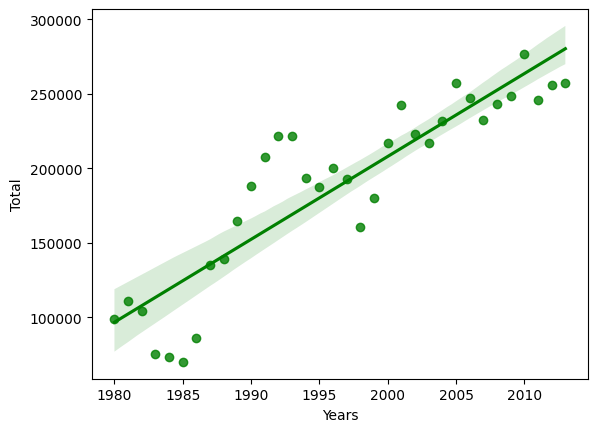

In [38]:
sns.regplot(x='Years',y='Total',data = df_total,color='green')